<font size="5">Providing a dataset of employees working in ABC company. It consists of 458 rows and 9 columns. The company needs the detailed report and explanation of their employees in each team, also need to identify the following:    

1.How many are there in each Team and the percentage splitting with respect to the total employees.


2.Segregate the employees w.r.t different positions.

    
3.Find from which age group most of the employees belong to.

    
4.Find out under which team and position, spending in terms of salary is high.


5.Find if there is any correlation between age and salary , represent it visually.

    
Before doing the above questions,perform pre processing of the dataset. Also, the column height is having incorrect data, changing the data of that particular column with any random numbers between 150 and 180.</font>

# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data

In [2]:
df = pd.read_excel('myexcel.xlsx')
df.shape

(458, 9)

In [3]:
# The data has 458 rows and 9 columns

# Understanding and Pre Processing the Data

In [4]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [5]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,2023-03-07 00:00:00,231,Kansas,947276.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [7]:
# The data has 5 categorical columns and 4 numerical columns

In [8]:
df.describe(include='all')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,2023-09-06 00:00:00,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,NaN,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,NaN,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


In [9]:
# The data has 30 unique teams in the column Team

In [10]:
# Handling the height column
df['Height']=np.random.randint(150,181,458)
df['Height']

0      151
1      153
2      152
3      173
4      174
      ... 
453    153
454    177
455    176
456    169
457    154
Name: Height, Length: 458, dtype: int32

In [11]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [12]:
# Columns 'College' and 'Salary' has some missing values

In [13]:
# Handling the missing values
df['College'] = df['College'].fillna('Not Available')
df['Salary'] = df['Salary'].fillna(0)

In [14]:
# Checking Duplicates
df.duplicated().sum()

0

# 1.How many are there in each Team and the percentage splitting with respect to the total employees.

# No of Players in each Team

In [15]:
Players_in_Teams = df['Team'].value_counts()
Players_in_Teams

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

# Percentage Split

In [17]:
Percent_split = Players_in_Teams/len(df)*100
Percent_split

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

# Pie chart showing the percentage split of players

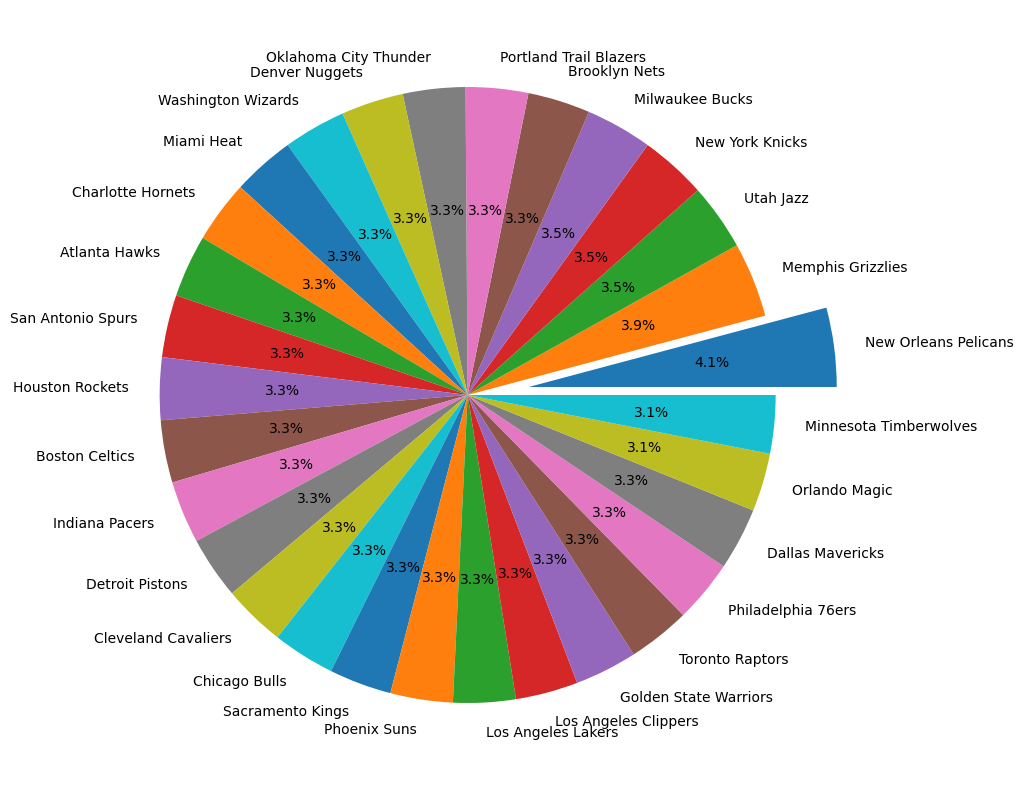

In [18]:

plt.figure(figsize=(10,10))
plt.pie(Percent_split.values,labels=Percent_split.index,autopct='%1.1f%%',explode =[0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] )
plt.show()

<font color='red' size='+2'><b>New Orleans Pelicans has the most no of Players</b></font>

# 2. Segregate the employees w.r.t different positions.

In [20]:
Position = df['Position'].value_counts()
Position

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

<font color='blue' size='+2'><b>Most players in the data plays in the 'SG' Position</b></font>

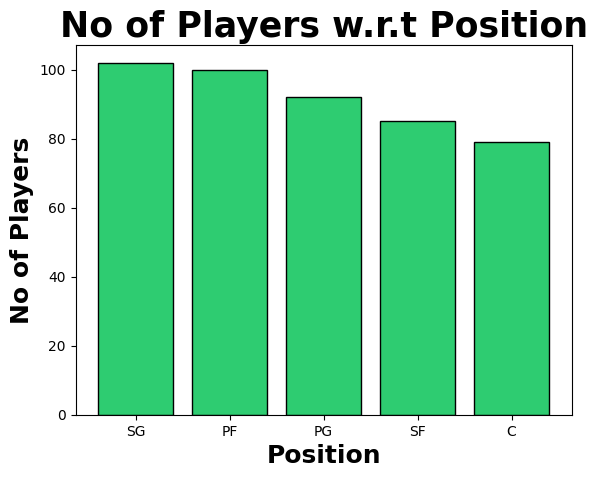

In [22]:
# Visualisation
plt.bar(Position.index,Position.values,edgecolor='black',color='#2ecc71')
plt.title('No of Players w.r.t Position',fontdict={'fontweight': 'bold','fontsize': 25,'family': 'sans-serif'})
plt.xlabel('Position',fontdict={'fontweight': 'bold','fontsize': 18,'family': 'sans-serif'})
plt.ylabel('No of Players',fontdict={'fontweight': 'bold','fontsize': 18,'family': 'sans-serif'})
plt.show()

<font color='green' size='+2'><b>The graph shows above 100 players are playing in 'SG' Position</b></font>

# 3. Find from which age group most of the employees belong to.

In [24]:
age_group = df['Age'].value_counts()
age_group

Age
24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: count, dtype: int64

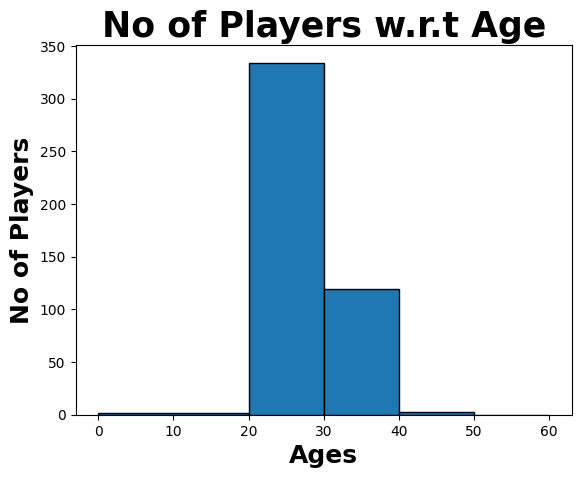

In [25]:
age_bins = [0, 20, 30, 40, 50, 60,]
plt.hist(df['Age'], bins=age_bins, edgecolor='black')
plt.title('No of Players w.r.t Age',fontdict={'fontweight': 'bold','fontsize': 25,'family': 'sans-serif'})
plt.xlabel('Ages',fontdict={'fontweight': 'bold','fontsize': 18,'family': 'sans-serif'})
plt.ylabel('No of Players',fontdict={'fontweight': 'bold','fontsize': 18,'family': 'sans-serif'})
plt.show()

<font color='red' size='+2'><b>Most Players are in the age group of 20-30</b></font>

# 4. Find out under which team and position, spending in terms of salary is high.

In [27]:
 df.loc[df['Salary'].idxmax(),['Name','Team','Position','Salary']]

Name               Kobe Bryant
Team        Los Angeles Lakers
Position                    SF
Salary              25000000.0
Name: 109, dtype: object

In [28]:
# This shows the name,team,position and salary of the highest paid Player

In [33]:
# converting the salary in terms of millions 
df['Salary in Millions'] = df['Salary']/1000000
df['Salary in Millions']

0      7.730337
1      6.796117
2      0.000000
3      1.148640
4      5.000000
         ...   
453    2.433333
454    0.900000
455    2.900000
456    0.947276
457    0.947276
Name: Salary in Millions, Length: 458, dtype: float64

In [32]:
Team_salary_spend = df.groupby('Team')['Salary in Millions'].sum()
Team_salary_spend

Team
Atlanta Hawks              72.902950
Boston Celtics             58.541068
Brooklyn Nets              52.528475
Charlotte Hornets          78.340920
Chicago Bulls              86.783378
Cleveland Cavaliers       106.988689
Dallas Mavericks           71.198732
Denver Nuggets             60.121930
Detroit Pistons            67.168263
Golden State Warriors      88.868997
Houston Rockets            75.283021
Indiana Pacers             66.751826
Los Angeles Clippers       94.854640
Los Angeles Lakers         71.770431
Memphis Grizzlies          76.550880
Miami Heat                 82.515673
Milwaukee Bucks            69.603517
Minnesota Timberwolves     59.709697
New Orleans Pelicans       82.750774
New York Knicks            73.303898
Oklahoma City Thunder      93.765298
Orlando Magic              60.161470
Philadelphia 76ers         30.992894
Phoenix Suns               63.445135
Portland Trail Blazers     48.301818
Sacramento Kings           71.683666
San Antonio Spurs          84.442

In [34]:
# Getting the team which spend maximum in terms of salary
Team_salary_spend.idxmax()

'Cleveland Cavaliers'

<font color='green' size='+2'><b>'Cleveland Cavaliers' is the Team which spend maximum in terms of salary</b></font>

# Bar Chart for Maximum amount spend by Teams

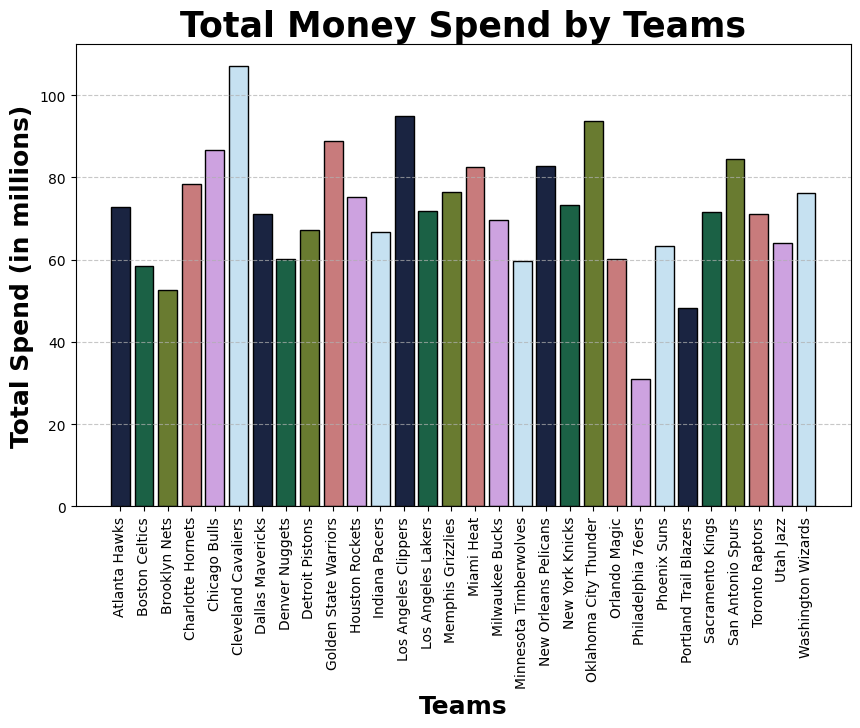

In [36]:

plt.figure(figsize=(10, 6))
colors = sns.color_palette( 'cubehelix')
plt.bar(Team_salary_spend.index,Team_salary_spend.values,edgecolor='black',color=colors)
plt.title('Total Money Spend by Teams',fontdict={'fontweight': 'bold','fontsize': 25,'family': 'sans-serif'})
plt.xlabel('Teams',fontdict={'fontweight': 'bold','fontsize': 18,'family': 'sans-serif'})
plt.ylabel('Total Spend (in millions)',fontdict={'fontweight': 'bold','fontsize': 18,'family': 'sans-serif'})
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation='vertical')
plt.show()

# Position for which teams spend Maximum

In [39]:
position_salary_spend = df.groupby('Position')['Salary in Millions'].sum()
position_salary_spend.idxmax()

'C'

<font color='green' size='+2'><b>Teams spend maximum amount for players playing in posititon 'C'</b></font>

# Bar chart showing money spend by Teams w.r.t Position

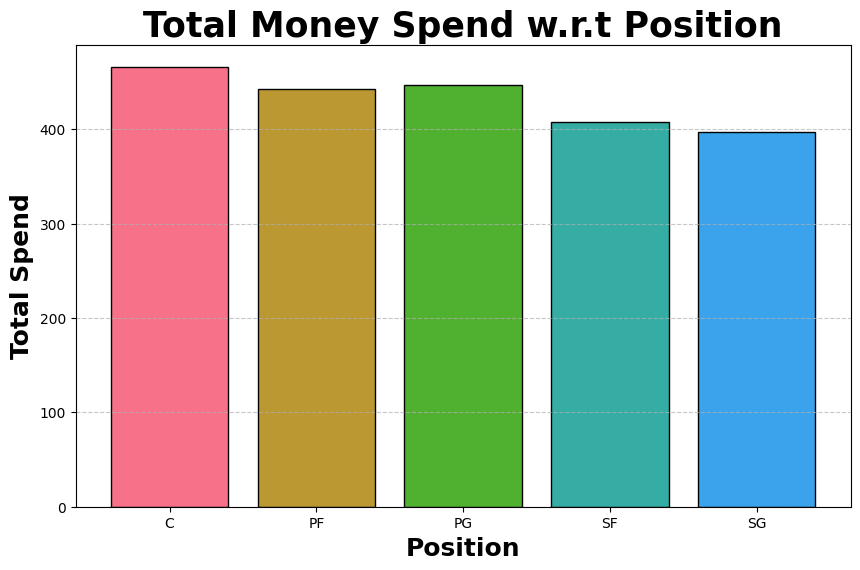

In [40]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette('husl')
plt.bar(position_salary_spend.index,position_salary_spend.values,edgecolor='black',color=colors)
plt.title('Total Money Spend w.r.t Position',fontdict={'fontweight': 'bold','fontsize': 25,'family': 'sans-serif'})
plt.xlabel('Position',fontdict={'fontweight': 'bold','fontsize': 18,'family': 'sans-serif'})
plt.ylabel('Total Spend',fontdict={'fontweight': 'bold','fontsize': 18,'family': 'sans-serif'})
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<font color='blue' size='+2'><b>Maximum amount spend for position 'C'</b></font>

# 5. Find if there is any correlation between age and salary , represent it visually.

In [42]:
# Calculating the correlation matrix for the age and salary columns
cor_matrix = df[['Age','Salary']].corr()
cor_matrix

,Age,Salary
Age,1.00000,0.20501
Salary,0.20501,1.00000


# Visual Representation using heatmap

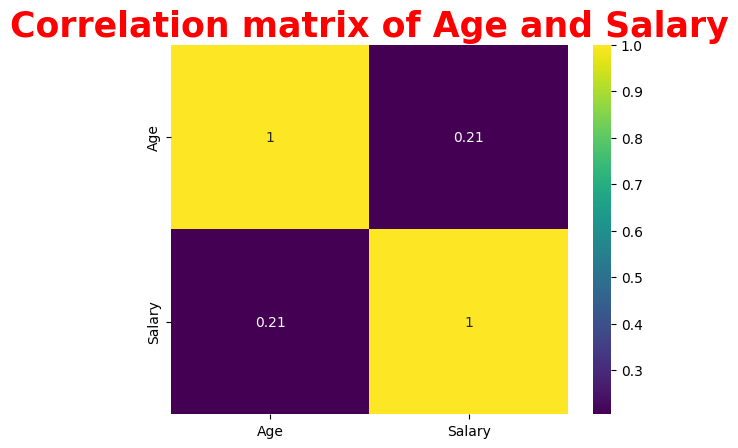

In [46]:
sns.heatmap(cor_matrix,annot=True,cmap="viridis")
plt.title('Correlation matrix of Age and Salary',fontdict={'fontweight': 'bold','fontsize': 25,'family': 'sans-serif','color':'red'})
plt.show()

<font color='green' size='+2'><b> Map shows that Age and Salary are Positively Correlated but it is not very strong</b></font>